In [67]:
import numpy as np
import pandas as pd
import sklearn.metrics
import tensorflow as tf
from tensorflow import keras
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy, binary_crossentropy

In [ ]:
df=pd.read_csv('/content/sample_data/plagiarism_student_dataset.csv',index_col=0)
df.index.names=[None]
print(df.dtypes)
df.describe()

In [31]:
df=pd.read_csv('/content/sample_data/Plagiarism_Dataset_A.csv',index_col=0)
# df.total_time=df.total_time.astype('Int64')
# df.compiled=df.compiled.astype('Int64')
# df.compiled_successfully=df.compiled_successfully.astype('Int64')
# df.ran_tests=df.ran_tests.astype('Int64')
# df.test_results=df.test_results.astype('Int64')
# df.modified=df.modified.astype('Int64')
# df.add_lines=df.add_lines.astype('Int64')
# df.change=df.change.astype('Int64')
# df.remove_lines=df.remove_lines.astype('Int64')
# df.average_test_results=df.average_test_results.astype(float)
df.index.names=[None]
print(df.dtypes)
df.describe()

total_time               float64
compiled                 float64
compiled_successfully    float64
ran_tests                float64
test_results             float64
modified                 float64
add_lines                float64
change                   float64
remove_lines             float64
average_test_results     float64
dtype: object


,total_time,compiled,compiled_successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,average_test_results
count,1.649000e+03,1245.000000,1225.000000,1189.000000,1080.000000,1657.000000,1371.000000,1253.000000,1348.00000,1080.000000
mean,3.278285e+06,1001.928514,727.128980,455.708158,606.377778,16730.980084,12978.304887,18639.660016,1830.37092,1.419867
std,3.545433e+06,1030.388479,801.730212,408.923276,647.694286,18826.084965,30391.713503,15650.986379,9759.25102,1.227793
min,0.000000e+00,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
25%,6.480800e+04,210.000000,139.000000,132.000000,180.750000,56.000000,1115.500000,5219.000000,189.75000,0.585329
50%,2.266672e+06,743.000000,514.000000,381.000000,406.500000,11383.000000,6205.000000,16288.000000,829.50000,1.076241
75%,5.560152e+06,1452.000000,1050.000000,679.000000,853.000000,28899.000000,13106.000000,28108.000000,1843.25000,1.869779
max,1.989646e+07,8538.000000,7322.000000,3087.000000,8574.000000,110104.000000,434940.000000,91703.000000,306833.00000,10.000000


In [ ]:
label_A=pd.read_csv('/content/sample_data/label_for_A.csv',index_col=0)
label_A.index.names=[None]
label_A.describe()

In [32]:
label_A=pd.read_csv('/content/sample_data/label_for_A.csv',index_col=0)
label_A.index.names=[None]
label_A.describe()

,label
count,1668.000000
mean,0.270384
std,0.444291
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [33]:
df.head()

,total_time,compiled,compiled_successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,average_test_results
A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,1.957910
A2016\student1016,37440.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0,NaN
A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,2.039390
A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.884977
A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,1.804009


In [34]:
label_A.head()

,label
A2016\student1013,0
A2016\student1016,0
A2016\student1021,1
A2016\student1029,1
A2016\student1066,0


In [35]:
label_list = label_A['label'].tolist()

In [36]:
print(label_list[:10])
print(len(label_list))

[0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
1668


In [37]:
df['label']=label_list
df.dropna(inplace = True)
trainA=df.iloc[:,:-1]
label_A=df.iloc[:,-1]

In [38]:
trainA.head()

,total_time,compiled,compiled_successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,average_test_results
A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,1.957910
A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,2.039390
A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.884977
A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,1.804009
A2016\student1110,1317536.0,302.0,254.0,120.0,91.0,8362.0,3930.0,6895.0,377.0,0.758333


In [39]:
scaler=MinMaxScaler(feature_range=(0,1))
train_A=scaler.fit_transform(trainA)

In [40]:
print(train_A.dtype)
print(train_A.shape)
print(train_A)

float64
(1064, 10)
[[0.34624961 0.16858013 0.1523016  ... 0.35545572 0.00658993 0.20362264]
 [0.47036546 0.24671978 0.17442972 ... 0.5343613  0.01989362 0.21209657]
 [0.34901029 0.20770853 0.16391203 ... 0.33075614 0.00874094 0.09203756]
 ...
 [0.15992339 0.07708529 0.05040295 ... 0.1581863  0.0021999  0.08118959]
 [0.16770623 0.07052484 0.04644174 ... 0.22122745 0.00585337 0.05411912]
 [0.39484164 0.12066542 0.07977052 ... 0.36841072 0.00856821 0.03670588]]


In [41]:
label_A=label_A.to_numpy()
print(label_A.dtype)
# label_A=label_A.astype(float)
print(label_A.shape)
print(label_A)

int64
(1064,)
[0 1 1 ... 1 1 1]


In [42]:
x_train,x_test,y_train,y_test= train_test_split(train_A,label_A,train_size=0.8)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(851, 10)
(851,)
(213, 10)
(213,)


In [44]:

model = Sequential([
    Dense(units=16, input_shape=(10,), activation='relu'),
    Dense(units=32, activation='relu'
    # ,kernel_regularizer=regularizers.l2(0.01)
    ),
    BatchNormalization(axis=1),
    Dense(units=1, activation='sigmoid')
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                176       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 881
Trainable params: 817
Non-trainable params: 64
_________________________________________________________________


In [46]:
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd,loss=binary_crossentropy,metrics=['accuracy'])

In [57]:
model.fit(x_train,
          y_train,
          epochs=30,
          verbose=2,
          validation_split=0.2,
          batch_size=10,
          shuffle=True
          )

Epoch 1/30
68/68 - 1s - loss: 0.6250 - accuracy: 0.6426 - val_loss: 0.6615 - val_accuracy: 0.6140 - 829ms/epoch - 12ms/step
Epoch 2/30
68/68 - 0s - loss: 0.6234 - accuracy: 0.6279 - val_loss: 0.6620 - val_accuracy: 0.6082 - 293ms/epoch - 4ms/step
Epoch 3/30
68/68 - 0s - loss: 0.6298 - accuracy: 0.6426 - val_loss: 0.6660 - val_accuracy: 0.6023 - 345ms/epoch - 5ms/step
Epoch 4/30
68/68 - 0s - loss: 0.6211 - accuracy: 0.6426 - val_loss: 0.6654 - val_accuracy: 0.6023 - 274ms/epoch - 4ms/step
Epoch 5/30
68/68 - 0s - loss: 0.6215 - accuracy: 0.6412 - val_loss: 0.6652 - val_accuracy: 0.6023 - 293ms/epoch - 4ms/step
Epoch 6/30
68/68 - 0s - loss: 0.6211 - accuracy: 0.6515 - val_loss: 0.6663 - val_accuracy: 0.6023 - 341ms/epoch - 5ms/step
Epoch 7/30
68/68 - 0s - loss: 0.6230 - accuracy: 0.6324 - val_loss: 0.6628 - val_accuracy: 0.6140 - 197ms/epoch - 3ms/step
Epoch 8/30
68/68 - 0s - loss: 0.6171 - accuracy: 0.6574 - val_loss: 0.6665 - val_accuracy: 0.5965 - 161ms/epoch - 2ms/step
Epoch 9/30
68/6

In [58]:
predictions=model.predict(x_test,batch_size=10,verbose=0)

In [59]:
print(predictions.dtype)
print(predictions)
# predictions=predictions.astype(int)

float32
[[0.2799915 ]
 [0.5670962 ]
 [0.62417233]
 [0.5055966 ]
 [0.4747325 ]
 [0.55309975]
 [0.5045641 ]
 [0.5857473 ]
 [0.12614444]
 [0.39244837]
 [0.47040302]
 [0.45140004]
 [0.5610648 ]
 [0.49413598]
 [0.51536727]
 [0.51766354]
 [0.5193139 ]
 [0.42721146]
 [0.3940105 ]
 [0.59642416]
 [0.36837488]
 [0.37811136]
 [0.37971768]
 [0.46434632]
 [0.19424495]
 [0.47526932]
 [0.4275155 ]
 [0.53085417]
 [0.16924235]
 [0.34648013]
 [0.48518637]
 [0.58489317]
 [0.24567807]
 [0.36630982]
 [0.4924968 ]
 [0.5632421 ]
 [0.45232046]
 [0.09439954]
 [0.5464068 ]
 [0.5924455 ]
 [0.49546203]
 [0.32641   ]
 [0.51723903]
 [0.49957424]
 [0.26239097]
 [0.33343422]
 [0.1288529 ]
 [0.37810302]
 [0.5530769 ]
 [0.5974115 ]
 [0.41048837]
 [0.30537713]
 [0.43844056]
 [0.4593674 ]
 [0.4524659 ]
 [0.4914927 ]
 [0.30863744]
 [0.5103936 ]
 [0.08245608]
 [0.5443579 ]
 [0.52221787]
 [0.3462965 ]
 [0.22550872]
 [0.46209976]
 [0.43740553]
 [0.6313367 ]
 [0.47587928]
 [0.42164516]
 [0.37514684]
 [0.55930233]
 [0.5366581 

In [60]:
print(predictions.shape)
seq_predictions=np.transpose(predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))

(213, 1)
(213,)


In [61]:
for i in seq_predictions:
  print(i)

0
1
1
1
0
1
1
1
0
0
0
0
1
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
1
0
1
0
1
0
1
1
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
1
1
0
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0


Comparing predictions and y_test

In [62]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [63]:
cm = confusion_matrix(y_test,seq_predictions)

In [64]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[96 39]
 [41 37]]


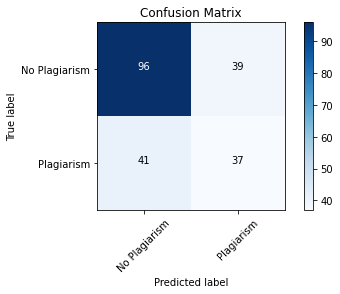

In [65]:
cm_plot_labels = ['No Plagiarism','Plagiarism']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [69]:
precision = sklearn.metrics.precision_score(y_test,seq_predictions, pos_label=1)
print(precision)

0.4868421052631579


In [70]:
acc = sklearn.metrics.accuracy_score(y_test, seq_predictions)
print(acc)

0.6244131455399061


In [71]:
recall = sklearn.metrics.recall_score(y_test, seq_predictions, pos_label=1)
print(recall)

0.47435897435897434


In [72]:
model.save('models/plagiarism_detection.h5')